# Imports

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data

In [2]:
data = pd.read_csv('../ToyotaCorolla.csv')

# 2.1

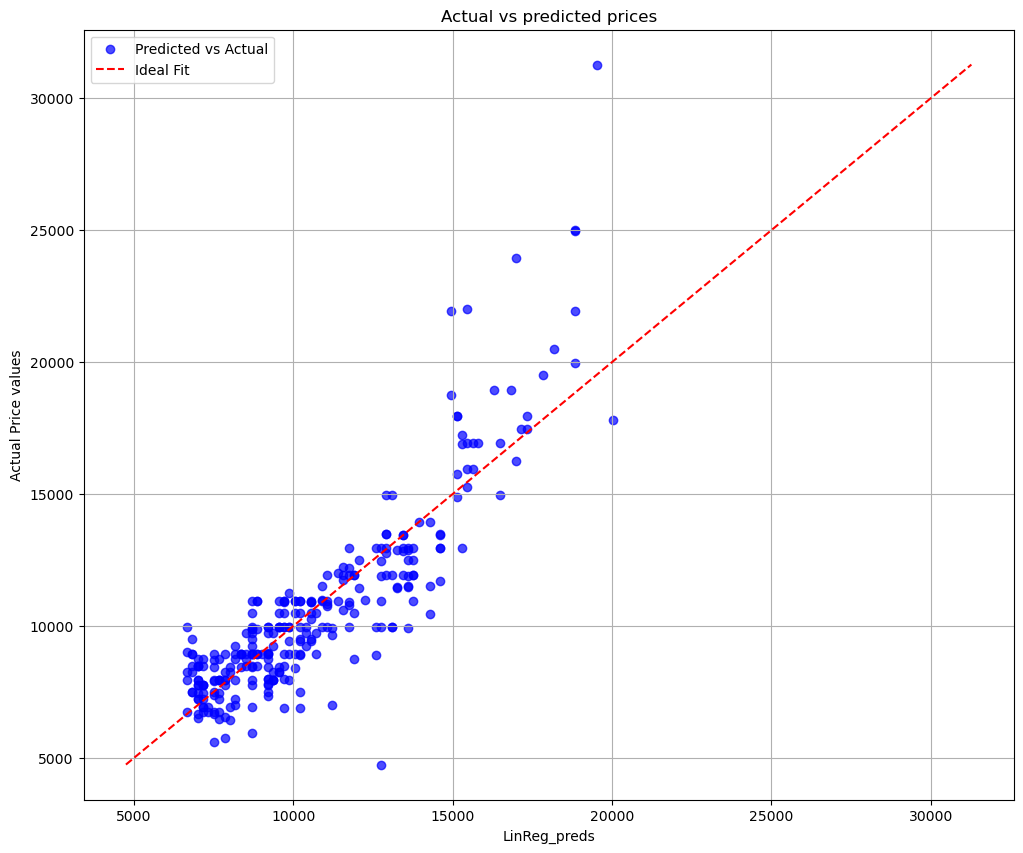

In [13]:
# 2.1.1

X = data['Age_08_04'].to_numpy().reshape(-1,1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, shuffle=True, random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('LinReg', LinearRegression())
])

pipe.fit(X_train, y_train)

LinReg_preds = pipe.predict(X_test)

plt.figure(figsize=(12,10))
plt.scatter(LinReg_preds, y_test, alpha = 0.7, color = 'b', label = 'Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('LinReg_preds')
plt.ylabel('Actual Price values')
plt.title('Actual vs predicted prices')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
# 2.1.1 continued

score = pipe.score(X_test, y_test)
print(f'R2 score: {score:.4f}')

r2_scores = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = 'r2')
print(f'R2 scores: {r2_scores}')
print(f'Mean R2 score: {r2_scores.mean()}')
print(f'Std. dev. R2 scores: {r2_scores.std()}')

kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipe, X_train, y_train, cv = kf_5, scoring='r2')
print(f'Mean R2 score: {r2_scores.mean()}')
print(f'Std. dev. R2 scores: {r2_scores.std()}')

r2_test = r2_score(y_test, LinReg_preds)
print(f'R2 score test set: {r2_test}')



R2 score: 0.7569
R2 scores: [0.74030131 0.79483424 0.77296994 0.80788261 0.70411312]
Mean R2 score: 0.7640202437801561
Std. dev. R2 scores: 0.037696041396406574
Mean R2 score: 0.7662487056606464
Std. dev. R2 scores: 0.018937354113146607
R2 score test set: 0.7569201277242213


In [25]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [29]:
# 2.1.2


X = data[['Age_08_04', 'Color', 'ABS']]
y = data['Price']

X = pd.get_dummies(X, columns=['Color', 'ABS'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

LinReg2 = LinearRegression()
LinReg2.fit(X_train, y_train)
LinReg_preds_2 = LinReg2.predict(X_test)
R2_score_2 = r2_score(y_test, LinReg_preds_2)
print(R2_score_2)

additional_variables = ['KM', 'Fuel_Type', 'Weight', 'Airco']
for var in additional_variables:
    X[var] = data[var]

X = pd.get_dummies(X, columns=['Fuel_Type', 'Airco'], drop_first=True)

X_train, X_test, _, _ = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

LinReg3 = LinearRegression()
LinReg3.fit(X_train, y_train)
LinReg3_preds = LinReg3.predict(X_test)
LinReg3_r2_score = r2_score(y_test, LinReg3_preds)
print(LinReg3_r2_score)



0.759822572223964
0.8216163961853744


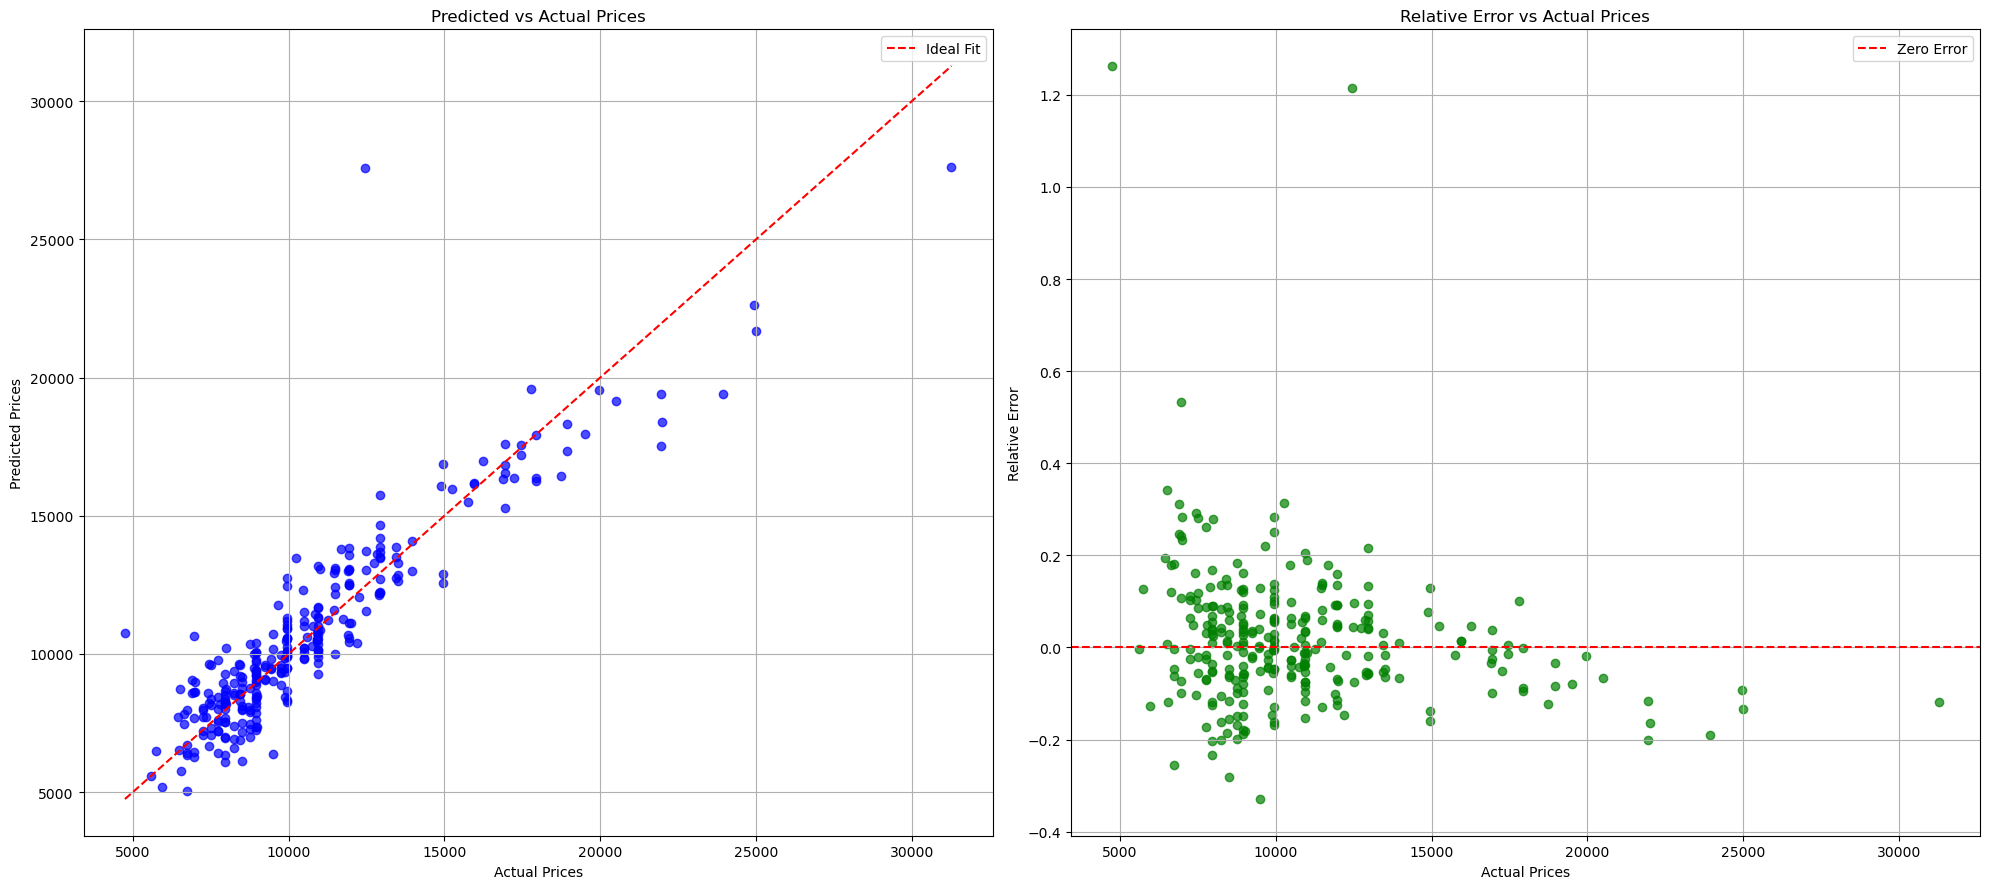

In [30]:
# 2.1.2 continued

# Relative error

relative_error_3 = (LinReg3_preds - y_test) / y_test

fig, ax = plt.subplots(1,2, figsize= (20,9))

ax[0].scatter(y_test, LinReg3_preds, alpha=0.7, color='blue')
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
ax[0].set_xlabel('Actual Prices')
ax[0].set_ylabel('Predicted Prices')
ax[0].set_title('Predicted vs Actual Prices')
ax[0].legend()
ax[0].grid(True)

# Subplot 2: Relative error vs Actual price
ax[1].scatter(y_test, relative_error_3, alpha=0.7, color='green')
ax[1].axhline(y=0, color='red', linestyle='--', label='Zero Error')
ax[1].set_xlabel('Actual Prices')
ax[1].set_ylabel('Relative Error')
ax[1].set_title('Relative Error vs Actual Prices')
ax[1].legend()
ax[1].grid(True)

# Display the figure
plt.tight_layout()
plt.show()


In [ ]:
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(pipe, X_train, y_train, cv=kf_5,)